In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv("/Titanic/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train.shape

(891, 12)

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Find and print the rows with na values of Embarked column
Embarked_missing=train['Embarked'].isna()
print(train[Embarked_missing])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [8]:
# as both the passengers were travelling on the same tickets no. and were in same cabin and majority of passengers
# boarded from S port so for simplicity sake I have subsituted the embarked port as S for these 2 passengers

train['Embarked'].fillna('S',inplace=True)
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [9]:
# age subsitution 
# subsitute the missing age with the mean age bye Sex and Pclass

findnull_ages = train[train['Age'].isnull()]

# determine mean age based on Sex and Pclass
mean_of_ages = train.groupby(['Sex','Pclass'])['Age'].mean()

def agesub(row):
    if pd.isnull(row['Age']):
        return mean_of_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']

print(train.isna().sum())
    

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [10]:
# drop unwanted columns of name, cabin and ticket no.
train = train.drop(['Name', 'Cabin', 'Ticket'], axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


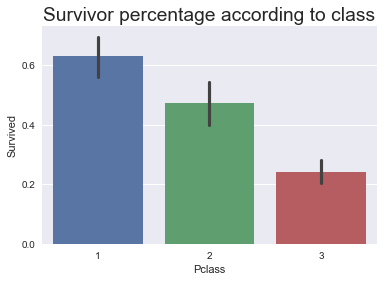

In [11]:
sns.barplot('Pclass', 'Survived', data=train)
sns.set_context('poster')
plt.title("Survivor percentage according to class")
plt.show()

# Shows people in first class had better chance of survival then rest

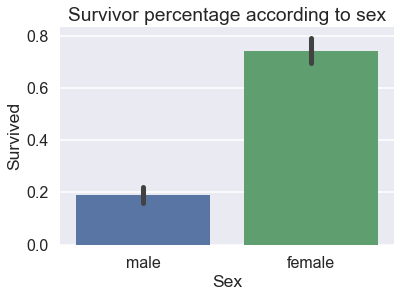

In [12]:
sns.barplot('Sex', 'Survived', data=train)
sns.set_context('poster')
plt.title("Survivor percentage according to sex")
plt.show()

# Shows female had better chance of survival then male

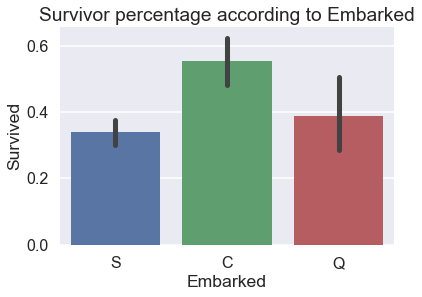

In [13]:
sns.barplot('Embarked', 'Survived', data=train)
plt.title("Survivor percentage according to Embarked")
plt.show()

# Shows that people who embarked at C had better chance of survival then rest

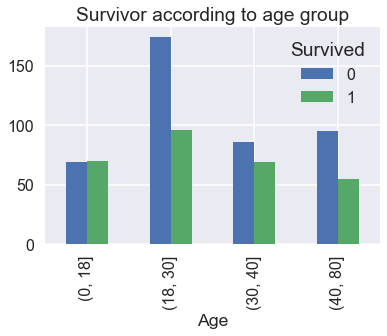

In [14]:
group = pd.cut(train.Age, [0,18,30,40,80])
piv_fare = train.pivot_table(index=group, columns='Survived', values = 'Age', aggfunc='count')
piv_fare.plot(kind='bar')
plt.title("Survivor according to age group")
plt.show()

# Shows that children had better chance of survival then rest

Survivors with no sibling/Spouse: 34.53947368421053
Survivors with one sibling/Spouse: 53.588516746411486
Survivors with two sibling/Spouse: 46.42857142857143
survivors with three sibling/Spouse: 25.0
Survivors with four sibling/Spouse: 16.666666666666664


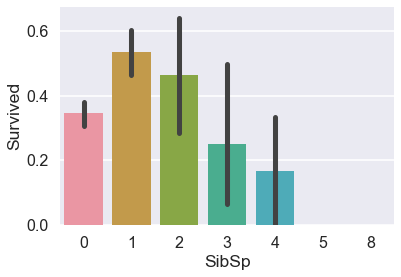

In [15]:
sns.barplot(data =train, x="SibSp",y="Survived")
print("Survivors with no sibling/Spouse:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Survivors with one sibling/Spouse:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Survivors with two sibling/Spouse:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("survivors with three sibling/Spouse:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("Survivors with four sibling/Spouse:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)

# Shows that people with a spouse or one sibling had the best chance of survivor
# Shows that as more siblings or spouses were present, the probability of survival was also lower.